In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

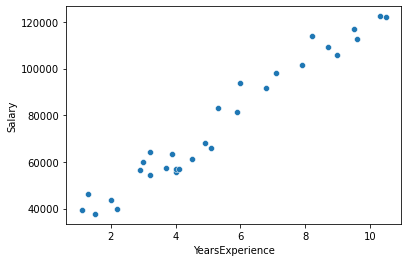

In [8]:

x=df.YearsExperience
y=df.Salary
sns.scatterplot(x,y)

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
relation=df.corr()
relation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

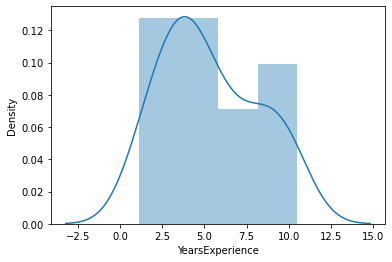

In [11]:
sns.distplot(x)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

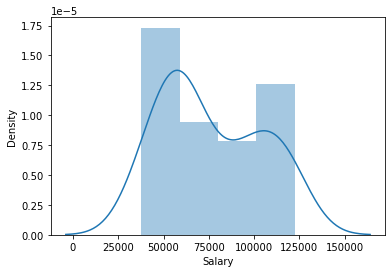

In [12]:
sns.distplot(y)

# MODEL BUILDING

In [13]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.14e-20
Time:                        11:03:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# PREDICTION

In [15]:
#newdata=pd.Series([2,4,6])
#data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])
#data_pred
pred=model.predict(df.iloc[:,0])


Text(0, 0.5, 'Salary')

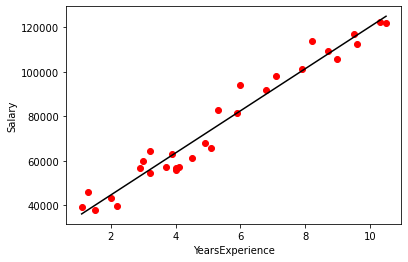

In [16]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='red')
plt.plot(df['YearsExperience'],pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [17]:
pred.corr(x)

1.0

# RMSE

In [18]:
import numpy as np
RMSE=np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
RMSE

5592.043608760662

# MODEL VALIDATION

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

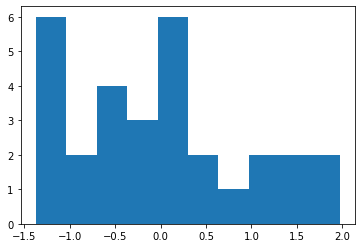

In [20]:
model.resid
plt.hist(model.resid_pearson)

Text(0, 0.5, 'Standardized Residual')

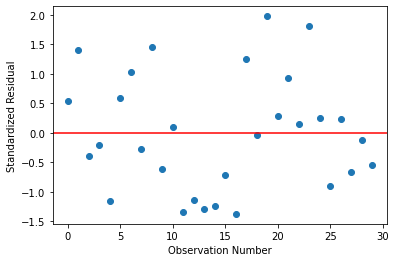

In [21]:
plt.scatter(np.arange(30),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")